<a href="https://colab.research.google.com/github/richdied/Python_Statistics/blob/main/007_Correlation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlation Analysis

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

* 키, 몸무게 데이터

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/PII.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       17 non-null     object 
 1   Gender     17 non-null     object 
 2   Age        17 non-null     int64  
 3   Grade      17 non-null     int64  
 4   Picture    17 non-null     object 
 5   BloodType  17 non-null     object 
 6   Height     17 non-null     float64
 7   Weight     17 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.2+ KB


In [ ]:
DF.head()

,Name,Gender,Age,Grade,Picture,BloodType,Height,Weight
0,송태섭,남자,21,3,무,B,179.1,63.9
1,최유정,여자,23,1,유,A,177.1,54.9
2,이한나,여자,20,1,무,A,167.9,50.2
3,김소혜,여자,23,3,무,O,176.1,53.5
4,서태웅,남자,24,4,무,B,176.1,79.8


# I. Covariance

> ## 1) 공분산

In [ ]:
import numpy as np

np.cov(DF.Height, DF.Weight)[0][1]

63.83036764705884

> ## 2) Pearson 상관계수

* 공분산을 두 변수의 표준편차의 곱으로 나눈 값

In [ ]:
np.cov(DF.Height, DF.Weight)[0][1] /    \
((np.std(DF.Height, ddof = 1) *         \
  np.std(DF.Weight, ddof = 1)))

0.6848075756314844

# II. scipy

In [ ]:
from scipy import stats

> ## 1) Karl Pearson 상관계수

* 기본적으로 등간척도/비율척도 변수에만 적용가능

In [ ]:
stats.pearsonr(DF.Height, DF.Weight)[0]

0.6848075756314843

> ## 2) spearman 상관계수

* 서열척도 변수가 포함되어도 적용가능
* 등간척도/비율척도 두 변수 간의 관계가 비선형적 일 때 적용

In [ ]:
stats.spearmanr(DF.Height, DF.Weight)[0]

0.6507060771796446

> ## 3) kendall tau

* spearman 상관계수와 같은 경우 적용가능
* 표본이 작을 때 spearman 상관계수보다 신뢰할 수 있음

In [ ]:
stats.kendalltau(DF.Height, DF.Weight)[0]

0.5278846884821402

# III. pandas

> ## 1) Pearson 상관계수

* method('pearson', 'spearman', 'kendall')

In [ ]:
DF.corr(method = 'pearson')

,Age,Grade,Height,Weight
Age,1.000000,0.495118,0.349681,0.452384
Grade,0.495118,1.000000,0.312777,0.574785
Height,0.349681,0.312777,1.000000,0.684808
Weight,0.452384,0.574785,0.684808,1.000000


> ## 2) Heat Map

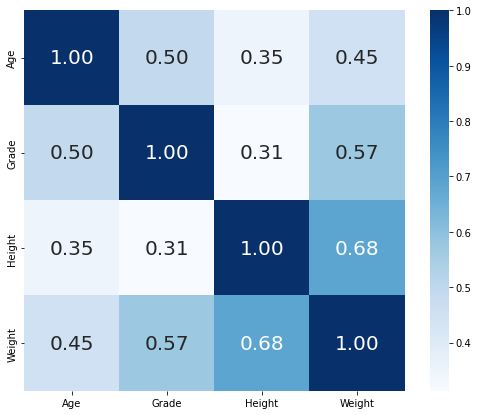

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (9, 7))
sns.heatmap(DF.corr(), 
            cbar = True, 
            annot = True, 
            annot_kws={'size' : 20}, 
            fmt = '.2f', 
            square = True, 
            cmap = 'Blues')
plt.show()

# IV. numpy

In [ ]:
import numpy as np

> ## 1) Pearson 상관계수

In [ ]:
np.corrcoef(DF.Height, DF.Weight)[0][1]

0.6848075756314843

# V. Visualization

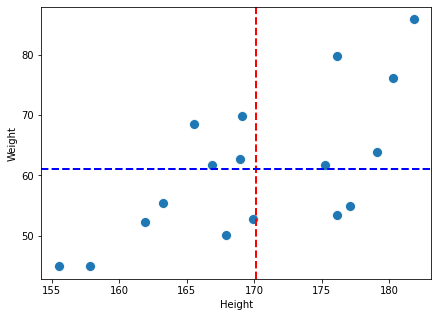

In [ ]:
plt.figure(figsize = (7, 5))
sns.scatterplot(x = DF.Height, 
                y = DF.Weight, 
                s = 100)
plt.axvline(DF.Height.mean(), 
            color = 'r', 
            linestyle = 'dashed', 
            linewidth = 2)
plt.axhline(DF.Weight.mean(), 
            color = 'b', 
            linestyle = 'dashed', 
            linewidth = 2)
plt.show()

# 
# 
# 
# The End
# 
# 
# 